<a href="https://colab.research.google.com/github/PhanDuyNhat/AI/blob/Code_AI/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=ff52ffbebeec551e118638b38c95585ee57ddb0166be2a25028ce7d5cbc0c08e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [7]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
x = np.arange(11)
mfx = fuzz.trimf(x,[0,5,10])
print(x)
print(mfx)

[ 0  1  2  3  4  5  6  7  8  9 10]
[0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]


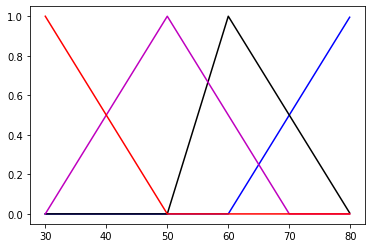

In [ ]:
import numpy as np 
import skfuzzy as fuzz 
import matplotlib.pyplot as plt 
x=np.arange(30,80,0.1)
slow=fuzz.trimf(x,[30,30,50])
average=fuzz.trimf(x,[30,50,70])
average_fast=fuzz.trimf(x,[50,60,80])
full_speed=fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x,full_speed,'b',lineWidth=1.5,label='Full_Speed')
plt.plot(x,average_fast,'k',lineWidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',lineWidth=1.5,label='Medium_Power')
plt.plot(x,slow,'r',lineWidth=1.5,label='Slow')




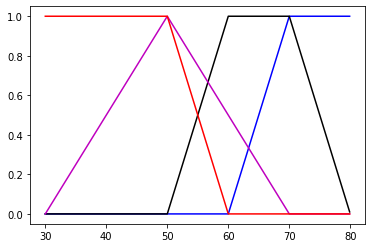

In [ ]:
import numpy as np 
import skfuzzy as fuzz 
import matplotlib.pyplot as plt 
x=np.arange(30,80,0.1)
slow=fuzz.trapmf(x,[30,30,50,60])
medium=fuzz.trapmf(x,[30,50,50,70])
medium_fast=fuzz.trapmf(x,[50,60,70,80])
full_speed=fuzz.trapmf(x,[60,70,80,80])
plt.figure()
plt.plot(x,full_speed,'b',lineWidth=1.5,label='Full_Speed')
plt.plot(x,medium_fast,'k',lineWidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',lineWidth=1.5,label='Medium_Power')
plt.plot(x,slow,'r',lineWidth=1.5,label='Slow')



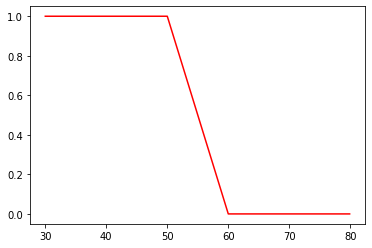

In [ ]:
import numpy as np 
import skfuzzy as fuzz 
import matplotlib.pyplot as plt 
x=np.arange(30,80,0.1)
slow=fuzz.trapmf(x,[30,30,50,60])
#medium=fuzz.trapmf(x,[30,50,50,70])
#medium_fast=fuzz.trapmf(x,[50,60,70,80])
#full_speed=fuzz.trapmf(x,[60,70,80,80])
plt.figure()
#plt.plot(x,full_speed,'b',lineWidth=1.5,label='Full_Speed')
#plt.plot(x,medium_fast,'k',lineWidth=1.5,label='Medium Fast')
#plt.plot(x,medium,'m',lineWidth=1.5,label='Medium_Power')
plt.plot(x,slow,'r',lineWidth=1.5,label='Slow')

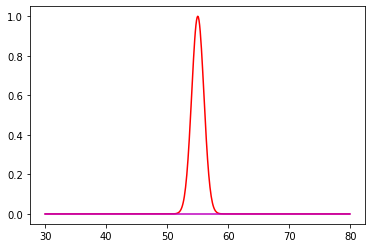

In [ ]:
import numpy as np 
import skfuzzy as fuzz 
import matplotlib.pyplot as plt 
x=np.arange(30,80,0.1)
slow=fuzz.gaussmf(x,55,1)
medium=fuzz.gaussmf(x,200,10)
plt.figure()
plt.plot(x,slow,'r',lineWidth=1.5,label='Slow')
plt.plot(x,medium,'m',lineWidth=1.5,label='Medium_Power')


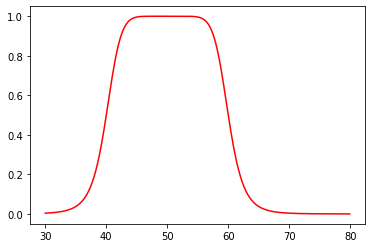

In [ ]:
import numpy as np 
import skfuzzy as fuzz 
import matplotlib.pyplot as plt 
x=np.arange(30,80,0.1)
slow=fuzz.gbellmf(x,10,4,50)
# 10:do rong 
# 4:do doc
# 50:tam

plt.figure()
plt.plot(x,slow,'r',lineWidth=1.5,label='Slow')



25.799407846039973


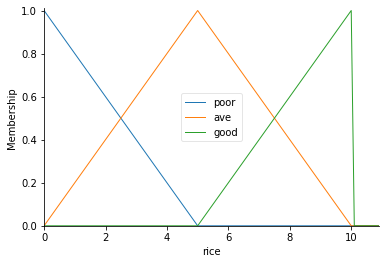

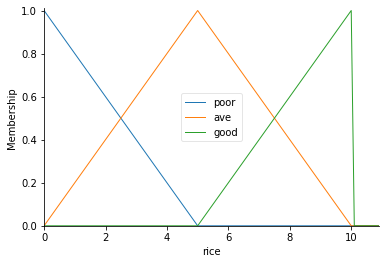

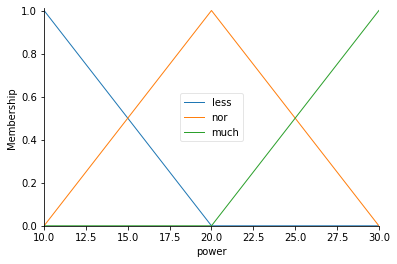

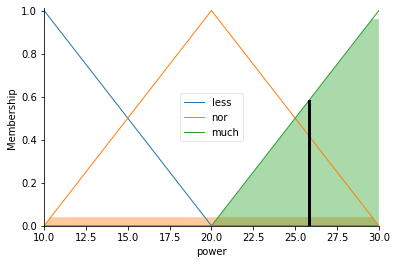

In [10]:
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import  control as ctrl
rice = ctrl.Antecedent(np.arange(0,11,1),'rice') #1 do phan giai
rice = ctrl.Antecedent(np.arange(0,11,0.1),'rice')
power=ctrl.Consequent(np.arange(10,31,1),'power')

rice['poor']= fuzz.trimf(rice.universe,[0,0,5])
rice['ave']= fuzz.trimf(rice.universe,[0,5,10])
rice['good']= fuzz.trimf(rice.universe,[5,10,10])

rice['poor']= fuzz.trimf(rice.universe,[0,0,5])
rice['ave']= fuzz.trimf(rice.universe,[0,5,10])
rice['good']= fuzz.trimf(rice.universe,[5,10,10])

power['less']= fuzz.trimf(power.universe,[10,10,20])
power['nor']= fuzz.trimf(power.universe,[10,20,30])
power['much']= fuzz.trimf(power.universe,[20,30,30])
rice.view()
rice.view()
power.view()

rule1=ctrl.Rule(rice['poor']&rice['poor'],power['less'])
rule2=ctrl.Rule(rice['poor']&rice['ave'],power['less'])
rule3=ctrl.Rule(rice['poor']&rice['good'],power['nor'])

rule4=ctrl.Rule(rice['ave']&rice['poor'],power['less'])
rule5=ctrl.Rule(rice['ave']&rice['ave'],power['nor'])
rule6=ctrl.Rule(rice['ave']&rice['good'],power['much'])

rule7=ctrl.Rule(rice['good']&rice['poor'],power['nor'])
rule8=ctrl.Rule(rice['good']&rice['ave'],power['much'])
rule9=ctrl.Rule(rice['good']&rice['good'],power['much'])

powerping_ctrl=ctrl.ControlSystem ([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
powerping= ctrl.ControlSystemSimulation (powerping_ctrl)
powerping.input['rice']=6.5
powerping.input['rice']=9.8
powerping.compute()
print(powerping.output['power'])
power.view(sim=powerping)






37.50463333532436


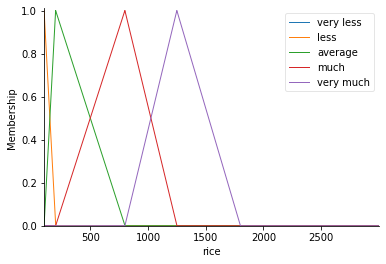

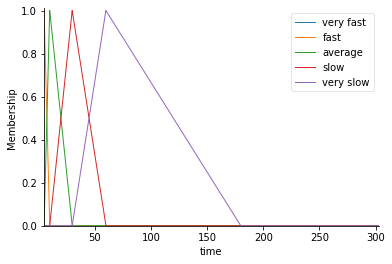

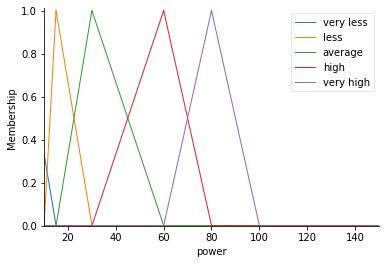

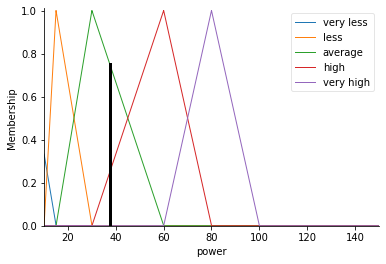

In [27]:
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import  control as ctrl
time = ctrl.Antecedent(np.arange(5,303,0.05),'time') #1 do phan giai
rice = ctrl.Antecedent(np.arange(100,3000,0.01),'rice')
power=ctrl.Consequent(np.arange(10,150,0.01),'power')

time['very fast']= fuzz.trimf(time.universe,[0,0,5])
time['fast']= fuzz.trimf(time.universe,[0,5,10])
time['average']= fuzz.trimf(time.universe,[5,10,30])
time['slow']= fuzz.trimf(time.universe,[10,30,60])
time['very slow']= fuzz.trimf(time.universe,[30,60,180])

rice['very less']= fuzz.trimf(rice.universe,[0,0,100])
rice['less']= fuzz.trimf(rice.universe,[0,100,200])
rice['average']= fuzz.trimf(rice.universe,[100,200,800])
rice['much']= fuzz.trimf(rice.universe,[200,800,1250])
rice['very much']= fuzz.trimf(rice.universe,[800,1250,1800])


power['very less']= fuzz.trimf(power.universe,[0,0,15])
power['less']= fuzz.trimf(power.universe,[10,15,30])
power['average']= fuzz.trimf(power.universe,[15,30,60])
power['high']= fuzz.trimf(power.universe,[30,60,80])
power['very high']= fuzz.trimf(power.universe,[60,80,100])
rice.view()
time.view()
power.view()

rule1 =   ctrl.Rule(rice['very less']& time['very slow'], power['very less'])
rule2 =   ctrl.Rule(rice['very less']& time['slow'], power['less'])
rule3 =   ctrl.Rule(rice['very less']& time['average'], power['average'])
rule4 =   ctrl.Rule(rice['very less']& time['fast'], power['high'])
rule5 =   ctrl.Rule(rice['very less']& time['very fast'], power['very high'])
rule6 =   ctrl.Rule(rice['less']& time['very slow'], power['very less'])
rule7 =   ctrl.Rule(rice['less']& time['slow'], power['less'])
rule8 =   ctrl.Rule(rice['less']& time['average'], power['less'])
rule9 =   ctrl.Rule(rice['less']& time['fast'], power['average'])
rule10 =  ctrl.Rule(rice['less']& time['very fast'], power['average'])
rule11 =  ctrl.Rule(rice['average']& time['very slow'], power['very less'])
rule12 =  ctrl.Rule(rice['average']& time['slow'], power['average'])
rule13 =  ctrl.Rule(rice['average']& time['average'], power['average'])
rule14 =  ctrl.Rule(rice['average']& time['fast'], power['average'])
rule15 =  ctrl.Rule(rice['average']& time['very fast'], power['high'])
rule16 =  ctrl.Rule(rice['much']& time['very slow'], power['average'])
rule17 =  ctrl.Rule(rice['much']& time['slow'], power['average'])
rule18 =  ctrl.Rule(rice['much']& time['average'], power['high'])
rule19 =  ctrl.Rule(rice['much']& time['fast'], power['high'])
rule20 =  ctrl.Rule(rice['much']& time['very fast'], power['very high'])
rule21 =  ctrl.Rule(rice['very much']& time['very slow'], power['average'])
rule22 =  ctrl.Rule(rice['very much']& time['slow'], power['average'])
rule23 =  ctrl.Rule(rice['very much']& time['average'], power['high'])
rule24 =  ctrl.Rule(rice['very much']& time['fast'], power['very high'])
rule25 =  ctrl.Rule(rice['very much']& time['very fast'], power['very high'])

powerping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powerping= ctrl.ControlSystemSimulation(powerping_ctrl)
powerping.input['rice']=1800
powerping.input['time']=180
powerping.compute()
print(powerping.output['power'])
power.view(sim=powerping)
     


